# Central Limit Theorem

In the hypothesis testing notebook, we have an example regarding the effect of a drug on the rats' response time. In order to evaluate the effectiveness, the researchers took a sample of 100 rats and measured the response time. And in order to infer the effectiveness on the rat population, we utilized z-scores and calculated how probable is it to obtain the sample mean response time in the population response time distribution? And we directly modelled the population as a normal distribution. But how could we do it? What is the rationale? Well, Central Limit Theorem allows us to make that assumption. Let's see what Central Limit Theorem is and understand why it is important.

Let's begin with an example.





- Suppose the proportion of American adults who support the expansion of solar energy is p = 0.88. 2 If we were to take a poll of 1000 adults on this
topic, the estimate would not be perfect, but how close might we expect the sample proportion in the poll would be to 88%?

We can simulate responses we would get from a simple random sample of 1000 American adults, which is only possible because we know the
actual support for expanding solar energy is 0.88

``` py
# 1. Create a set of 250 million entries, where 88% of them are "support" and 12% are "not".
population_size = 250*10**6
possible_entries = np.random.choice(["support", "not"], p=[0.88, 0.12], size=population_size)

# 2. Sample 1000 entries without replacement.
sample_size = 1000
sampled_entries = np.random.choice(possible_entries, size=sample_size)

# 3. count the number that are "support", then divide by the sample size.
sum(sampled_entries == "support") / sample_size
```

One simulation isn’t enough to get a great sense of the distribution of estimates we might expect in the simulation, so we should run more simulations. If we run the simulation 10,000 times and store the mean of each sample, then what we obtain is called a **sampling distribution**, i.e distribution of our sample means. And, no matter what characteristic our population holds, the sampling distribution can be approximated to a normal distribution, due to central limit theorem.


[*OpenIntro Statistics*. Fourth Edition.]

---

Central Limit Theorem

> **The sampling distribution of the sample means approaches a normal distribution as the sample size gets larger, with mean equal to the population mean, $\mu$, and standard error (deviation) equal to $\sigma/\sqrt{N}$, where $\sigma$ is population std and N is sample size.**

---

Assumptions Behind the Central Limit Theorem

- It must be sampled randomly
- Samples should be independent of each other.
- Sufficiently large sample size.

Let's visualize the Central Limit Theorem with a synthetic data.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from ipywidgets import interact, widgets

%matplotlib inline

In [2]:
def plot_clt(sample_size):

  # population size
  n = 10**6
  exp = stats.expon.rvs(size=n)

  # number of samples
  n_samples = 10**5
  exp_means = []

  for _ in range(n_samples):
    exp_means.append(np.random.choice(exp, sample_size).mean())

  fig, axes = plt.subplots(1, 2, figsize=(10,5))

  axes[0].hist(exp, bins="scott")
  axes[0].set_title("Exponential Dist.")
  axes[1].hist(exp_means, bins="scott")
  axes[1].set_title(f"Sampling Dist. with Sample Size {sample_size}")

slider = widgets.IntSlider(value=1, min=1, max=1000)
interact(plot_clt, sample_size=slider)

interactive(children=(IntSlider(value=1, description='sample_size', max=1000, min=1), Output()), _dom_classes=…

<function __main__.plot_clt>

Back to the rat's response time experiment

Since the sample size of the experiment is large enough, the central limit theorem will apply, and no assumptions need be made about the population of response time measurement. The sampling distribution of the sample mean response of 100 rats will be approximately normal, regardless of the distribution of the individual rats’ responsetimes.

## Sample Questions

**Q1.** In a UK survey, 58% of respondents said they will vote LEAVE. What is the probability that a randomly selected respondent from this sample will vote REMAIN ? 

- a) 0.42
- b) more than 0.42 	
- c) less than 0.42 	
- d) cannot calculate using only the information given

**Q2.** Z scores are defined for distributions of any shape, but only when the distribution is YYYY we can use Z scores to calculate percentiles. What is YYYY?

**Q3.** Cumulative SAT scores are approximated well by a normal model, $N(\mu=1500, \sigma=300)$. Shannon is a randomly selected SAT taker, and nothing is known about Shannon’s SAT aptitude. What is the probability Shannon scores at least 1630 on her SATs? First, always draw and label a picture of the normal distribution.

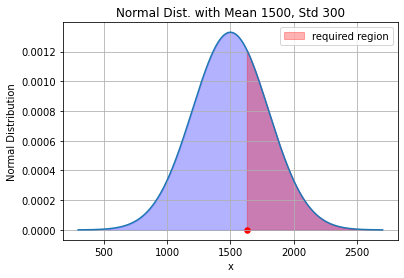

In [7]:
mean = 1500
std = 300
offset = 4*std
n = 1000

# the x-axis ticks of the plot
# generates 100 equally separated ticks
x = np.linspace(mean - offset, mean + offset, n)

# probability density function
# of the given normal dist.
y = stats.norm.pdf(x,mean,std)

test_score = 1630
x_shaded = np.linspace(test_score, mean+offset, n)
y_shaded = stats.norm.pdf(x_shaded,mean,std)


plt.plot(x,y)
# put grids on the figure
plt.grid()
plt.xlabel('x')
plt.ylabel('Normal Distribution')
plt.fill_between(x, y, alpha=0.3, color='b')
plt.fill_between(x_shaded, y_shaded, alpha=0.3, color='red', label="required region")
plt.scatter(test_score,0,color="red", s=30)
plt.title('Normal Dist. with Mean {}, Std {}'.format(mean, std))
plt.legend()
plt.show()

In order to find the area of the region, we can calculate the z-score and then find the probability.

In [8]:
z_score = (test_score - mean) / std
z_score

0.43333333333333335

In [10]:
stats.norm.sf(z_score)

0.33238631262667506